<h1>Corporate Employee Attrition Analytics

<h3>Predicting employee attrition using Random forest algorithm


<h1>Data Module

In [ ]:
#importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob

In [ ]:
#load Data
df1 = pd.read_csv("/content/employee_survey_data.csv")
df2 = pd.read_csv("/content/general_data.csv")
df3 = pd.read_csv("/content/manager_survey_data.csv")

#Data Preprocessing


In [ ]:
print("Employee survey data")
df1.head()

Employee survey data


,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,1,3.0,4.0,2.0
1,2,3.0,2.0,4.0
2,3,2.0,2.0,1.0
3,4,4.0,4.0,3.0
4,5,4.0,1.0,3.0


In [ ]:
df1.tail()

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
4405,4406,4.0,1.0,3.0
4406,4407,4.0,4.0,3.0
4407,4408,1.0,3.0,3.0
4408,4409,4.0,1.0,3.0
4409,4410,1.0,3.0,NaN


In [ ]:
print("General data")
df2.head()

General data


,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4


In [ ]:
df2.tail()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
4405,42,No,Travel_Rarely,Research & Development,5,4,Medical,1,4406,Female,...,3.0,Y,17,8,1,10.0,5,3,0,2
4406,29,No,Travel_Rarely,Research & Development,2,4,Medical,1,4407,Male,...,2.0,Y,15,8,0,10.0,2,3,0,2
4407,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,1,4408,Male,...,0.0,Y,20,8,0,5.0,4,4,1,2
4408,42,No,Travel_Rarely,Sales,18,2,Medical,1,4409,Male,...,0.0,Y,14,8,1,10.0,2,9,7,8
4409,40,No,Travel_Rarely,Research & Development,28,3,Medical,1,4410,Male,...,0.0,Y,12,8,0,NaN,6,21,3,9


In [ ]:
print("Manager survey data")
df3.head()

Manager survey data


,EmployeeID,JobInvolvement,PerformanceRating
0,1,3,3
1,2,2,4
2,3,3,3
3,4,2,3
4,5,3,3


In [ ]:
df3.tail()

,EmployeeID,JobInvolvement,PerformanceRating
4405,4406,3,3
4406,4407,2,3
4407,4408,3,4
4408,4409,2,3
4409,4410,4,3


<h2>Merging the datasets

**Merging the Dataframe 1 and 2 based on the Common Column 'EmployeeID'**

In [ ]:
df1_2 = df1.merge(df2,on ="EmployeeID", suffixes=('_left'))

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:9203: FutureWarning: Passing 'suffixes' as a <class 'str'>, is not supported and may give unexpected results. Provide 'suffixes' as a tuple instead. In the future a 'TypeError' will be raised.
  validate=validate,


In [ ]:
#Merged data
df1_2.head()

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,1,3.0,4.0,2.0,51,No,Travel_Rarely,Sales,6,2,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,2,3.0,2.0,4.0,31,Yes,Travel_Frequently,Research & Development,10,1,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,3,2.0,2.0,1.0,32,No,Travel_Frequently,Research & Development,17,4,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,4,4.0,4.0,3.0,38,No,Non-Travel,Research & Development,2,5,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,5,4.0,1.0,3.0,32,No,Travel_Rarely,Research & Development,10,1,...,4.0,Y,12,8,2,9.0,2,6,0,4


**Similarly Merging Dataframe 1,2 and 3 based on the Common Colunm 'EmployeeID'**

In [ ]:
df = df1_2.merge(df3,on ="EmployeeID", suffixes=('left'))

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:9203: FutureWarning: Passing 'suffixes' as a <class 'str'>, is not supported and may give unexpected results. Provide 'suffixes' as a tuple instead. In the future a 'TypeError' will be raised.
  validate=validate,


In [ ]:
df.head()

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,...,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating
0,1,3.0,4.0,2.0,51,No,Travel_Rarely,Sales,6,2,...,11,8,0,1.0,6,1,0,0,3,3
1,2,3.0,2.0,4.0,31,Yes,Travel_Frequently,Research & Development,10,1,...,23,8,1,6.0,3,5,1,4,2,4
2,3,2.0,2.0,1.0,32,No,Travel_Frequently,Research & Development,17,4,...,15,8,3,5.0,2,5,0,3,3,3
3,4,4.0,4.0,3.0,38,No,Non-Travel,Research & Development,2,5,...,11,8,3,13.0,5,8,7,5,2,3
4,5,4.0,1.0,3.0,32,No,Travel_Rarely,Research & Development,10,1,...,12,8,2,9.0,2,6,0,4,3,3


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4410 entries, 0 to 4409
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmployeeID               4410 non-null   int64  
 1   EnvironmentSatisfaction  4385 non-null   float64
 2   JobSatisfaction          4390 non-null   float64
 3   WorkLifeBalance          4372 non-null   float64
 4   Age                      4410 non-null   int64  
 5   Attrition                4410 non-null   object 
 6   BusinessTravel           4410 non-null   object 
 7   Department               4410 non-null   object 
 8   DistanceFromHome         4410 non-null   int64  
 9   Education                4410 non-null   int64  
 10  EducationField           4410 non-null   object 
 11  EmployeeCount            4410 non-null   int64  
 12  Gender                   4410 non-null   object 
 13  JobLevel                 4410 non-null   int64  
 14  JobRole                 

In [ ]:
df.describe()

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,DistanceFromHome,Education,EmployeeCount,JobLevel,MonthlyIncome,...,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating
count,4410.000000,4385.000000,4390.000000,4372.000000,4410.000000,4410.000000,4410.000000,4410.0,4410.000000,4410.000000,...,4410.000000,4410.0,4410.000000,4401.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000
mean,2205.500000,2.723603,2.728246,2.761436,36.923810,9.192517,2.912925,1.0,2.063946,65029.312925,...,15.209524,8.0,0.793878,11.279936,2.799320,7.008163,2.187755,4.123129,2.729932,3.153741
std,1273.201673,1.092756,1.101253,0.706245,9.133301,8.105026,1.023933,0.0,1.106689,47068.888559,...,3.659108,0.0,0.851883,7.782222,1.288978,6.125135,3.221699,3.567327,0.711400,0.360742
min,1.000000,1.000000,1.000000,1.000000,18.000000,1.000000,1.000000,1.0,1.000000,10090.000000,...,11.000000,8.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000
25%,1103.250000,2.000000,2.000000,2.000000,30.000000,2.000000,2.000000,1.0,1.000000,29110.000000,...,12.000000,8.0,0.000000,6.000000,2.000000,3.000000,0.000000,2.000000,2.000000,3.000000
50%,2205.500000,3.000000,3.000000,3.000000,36.000000,7.000000,3.000000,1.0,2.000000,49190.000000,...,14.000000,8.0,1.000000,10.000000,3.000000,5.000000,1.000000,3.000000,3.000000,3.000000
75%,3307.750000,4.000000,4.000000,3.000000,43.000000,14.000000,4.000000,1.0,3.000000,83800.000000,...,18.000000,8.0,1.000000,15.000000,3.000000,9.000000,3.000000,7.000000,3.000000,3.000000
max,4410.000000,4.000000,4.000000,4.000000,60.000000,29.000000,5.000000,1.0,5.000000,199990.000000,...,25.000000,8.0,3.000000,40.000000,6.000000,40.000000,15.000000,17.000000,4.000000,4.000000


**Saving it as final.csv file for further Use**

In [ ]:
#df.to_csv('final.csv')

In [ ]:
df.shape

(4410, 29)

#Data Cleaning

**Checking NULL values**

In [ ]:
df.isnull().any()

EmployeeID                 False
EnvironmentSatisfaction     True
JobSatisfaction             True
WorkLifeBalance             True
Age                        False
Attrition                  False
BusinessTravel             False
Department                 False
DistanceFromHome           False
Education                  False
EducationField             False
EmployeeCount              False
Gender                     False
JobLevel                   False
JobRole                    False
MaritalStatus              False
MonthlyIncome              False
NumCompaniesWorked          True
Over18                     False
PercentSalaryHike          False
StandardHours              False
StockOptionLevel           False
TotalWorkingYears           True
TrainingTimesLastYear      False
YearsAtCompany             False
YearsSinceLastPromotion    False
YearsWithCurrManager       False
JobInvolvement             False
PerformanceRating          False
dtype: bool

In [ ]:
df.isnull().sum()

EmployeeID                  0
EnvironmentSatisfaction    25
JobSatisfaction            20
WorkLifeBalance            38
Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
JobInvolvement              0
PerformanceRating           0
dtype: int64

**Replacing the NULL values based on the AVERAGE obtained from DESCRIPTION**


In [ ]:
df['EnvironmentSatisfaction'] = df['EnvironmentSatisfaction'].replace(np.nan, 2.723603)
df['JobSatisfaction'] = df['JobSatisfaction'].replace(np.nan, 2.728246)
df['WorkLifeBalance'] = df['WorkLifeBalance'].replace(np.nan, 2.761436)
df['NumCompaniesWorked'] = df['NumCompaniesWorked'].replace(np.nan, 2.694830)
df['TotalWorkingYears'] = df['TotalWorkingYears'].replace(np.nan, 11.279936)

**Checking NULL values after Replacing it**

In [ ]:
df.isnull().sum()

EmployeeID                 0
EnvironmentSatisfaction    0
JobSatisfaction            0
WorkLifeBalance            0
Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EmployeeCount              0
Gender                     0
JobLevel                   0
JobRole                    0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
Over18                     0
PercentSalaryHike          0
StandardHours              0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
JobInvolvement             0
PerformanceRating          0
dtype: int64

------------------

---



<h3>Describing the Mathematical  and statistical Functions of All the Columns

In [ ]:
pd.set_option('display.max_columns', 30)
df.describe(include='all')

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating
count,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410,4410,4410,4410.000000,4410.000000,4410,4410.0,4410,4410.000000,4410,4410,4410.000000,4410.000000,4410,4410.000000,4410.0,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000
unique,NaN,NaN,NaN,NaN,NaN,2,3,3,NaN,NaN,6,NaN,2,NaN,9,3,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,No,Travel_Rarely,Research & Development,NaN,NaN,Life Sciences,NaN,Male,NaN,Sales Executive,Married,NaN,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,3699,3129,2883,NaN,NaN,1818,NaN,2646,NaN,978,2019,NaN,NaN,4410,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2205.500000,2.723603,2.728246,2.761436,36.923810,NaN,NaN,NaN,9.192517,2.912925,NaN,1.0,NaN,2.063946,NaN,NaN,65029.312925,2.694830,NaN,15.209524,8.0,0.793878,11.279936,2.799320,7.008163,2.187755,4.123129,2.729932,3.153741
std,1273.201673,1.089654,1.098753,0.703195,9.133301,NaN,NaN,NaN,8.105026,1.023933,NaN,0.0,NaN,1.106689,NaN,NaN,47068.888559,2.493497,NaN,3.659108,0.0,0.851883,7.774275,1.288978,6.125135,3.221699,3.567327,0.711400,0.360742
min,1.000000,1.000000,1.000000,1.000000,18.000000,NaN,NaN,NaN,1.000000,1.000000,NaN,1.0,NaN,1.000000,NaN,NaN,10090.000000,0.000000,NaN,11.000000,8.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000
25%,1103.250000,2.000000,2.000000,2.000000,30.000000,NaN,NaN,NaN,2.000000,2.000000,NaN,1.0,NaN,1.000000,NaN,NaN,29110.000000,1.000000,NaN,12.000000,8.0,0.000000,6.000000,2.000000,3.000000,0.000000,2.000000,2.000000,3.000000
50%,2205.500000,3.000000,3.000000,3.000000,36.000000,NaN,NaN,NaN,7.000000,3.000000,NaN,1.0,NaN,2.000000,NaN,NaN,49190.000000,2.000000,NaN,14.000000,8.0,1.000000,10.000000,3.000000,5.000000,1.000000,3.000000,3.000000,3.000000
75%,3307.750000,4.000000,4.000000,3.000000,43.000000,NaN,NaN,NaN,14.000000,4.000000,NaN,1.0,NaN,3.000000,NaN,NaN,83800.000000,4.000000,NaN,18.000000,8.0,1.000000,15.000000,3.000000,9.000000,3.000000,7.000000,3.000000,3.000000


<h3>The attrition respect to the Employee is counted

In [ ]:
attrition_count = pd.DataFrame(df["Attrition"].value_counts())
print(attrition_count)

     Attrition
No        3699
Yes        711


<h2>Pie-chart for Employee Attrition

In [ ]:
df.head()

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating
0,1,3.0,4.0,2.0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,Female,1,Healthcare Representative,Married,131160,1.0,Y,11,8,0,1.0,6,1,0,0,3,3
1,2,3.0,2.0,4.0,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,Female,1,Research Scientist,Single,41890,0.0,Y,23,8,1,6.0,3,5,1,4,2,4
2,3,2.0,2.0,1.0,32,No,Travel_Frequently,Research & Development,17,4,Other,1,Male,4,Sales Executive,Married,193280,1.0,Y,15,8,3,5.0,2,5,0,3,3,3
3,4,4.0,4.0,3.0,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,Male,3,Human Resources,Married,83210,3.0,Y,11,8,3,13.0,5,8,7,5,2,3
4,5,4.0,1.0,3.0,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,Male,1,Sales Executive,Single,23420,4.0,Y,12,8,2,9.0,2,6,0,4,3,3


([<matplotlib.patches.Wedge at 0x7f833deda9d0>,
 [Text(-1.0493363707830166, 0.5821453263163142, 'No'),
  Text(0.961891673217765, -0.5336332157899548, 'Yes')])

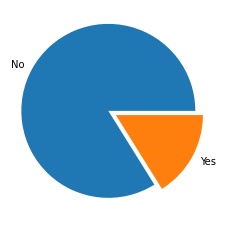

In [ ]:
plt.pie(attrition_count['Attrition'], labels= ['No','Yes'] , explode = (0.1,0))

<h2>Dropping Unwanted Column

In [ ]:
df.drop('EmployeeCount', axis=1, inplace=True)
df.shape

(4410, 28)

<h2>The Attrition column has Yes and No values. Its converted into Two columns by replacing 1/0

In [ ]:
df.head()

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating
0,1,3.0,4.0,2.0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,Female,1,Healthcare Representative,Married,131160,1.0,Y,11,8,0,1.0,6,1,0,0,3,3
1,2,3.0,2.0,4.0,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,Female,1,Research Scientist,Single,41890,0.0,Y,23,8,1,6.0,3,5,1,4,2,4
2,3,2.0,2.0,1.0,32,No,Travel_Frequently,Research & Development,17,4,Other,Male,4,Sales Executive,Married,193280,1.0,Y,15,8,3,5.0,2,5,0,3,3,3
3,4,4.0,4.0,3.0,38,No,Non-Travel,Research & Development,2,5,Life Sciences,Male,3,Human Resources,Married,83210,3.0,Y,11,8,3,13.0,5,8,7,5,2,3
4,5,4.0,1.0,3.0,32,No,Travel_Rarely,Research & Development,10,1,Medical,Male,1,Sales Executive,Single,23420,4.0,Y,12,8,2,9.0,2,6,0,4,3,3


In [ ]:
attrition_split = pd.get_dummies(df['Attrition'],columns=['name'])
attrition_split.head()

,No,Yes
0,1,0
1,0,1
2,1,0
3,1,0
4,1,0


<h2>Concatinating The attrition Split data with Original Data Frame

In [ ]:
df = pd.concat([df, attrition_split],axis=1)
df.head()

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,No,Yes
0,1,3.0,4.0,2.0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,Female,1,Healthcare Representative,Married,131160,1.0,Y,11,8,0,1.0,6,1,0,0,3,3,1,0
1,2,3.0,2.0,4.0,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,Female,1,Research Scientist,Single,41890,0.0,Y,23,8,1,6.0,3,5,1,4,2,4,0,1
2,3,2.0,2.0,1.0,32,No,Travel_Frequently,Research & Development,17,4,Other,Male,4,Sales Executive,Married,193280,1.0,Y,15,8,3,5.0,2,5,0,3,3,3,1,0
3,4,4.0,4.0,3.0,38,No,Non-Travel,Research & Development,2,5,Life Sciences,Male,3,Human Resources,Married,83210,3.0,Y,11,8,3,13.0,5,8,7,5,2,3,1,0
4,5,4.0,1.0,3.0,32,No,Travel_Rarely,Research & Development,10,1,Medical,Male,1,Sales Executive,Single,23420,4.0,Y,12,8,2,9.0,2,6,0,4,3,3,1,0


<h2>Either Yes or No is required So dropping out No column

In [ ]:
df = df.drop(['Attrition','No'], axis=1)
df.head()

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,Yes
0,1,3.0,4.0,2.0,51,Travel_Rarely,Sales,6,2,Life Sciences,Female,1,Healthcare Representative,Married,131160,1.0,Y,11,8,0,1.0,6,1,0,0,3,3,0
1,2,3.0,2.0,4.0,31,Travel_Frequently,Research & Development,10,1,Life Sciences,Female,1,Research Scientist,Single,41890,0.0,Y,23,8,1,6.0,3,5,1,4,2,4,1
2,3,2.0,2.0,1.0,32,Travel_Frequently,Research & Development,17,4,Other,Male,4,Sales Executive,Married,193280,1.0,Y,15,8,3,5.0,2,5,0,3,3,3,0
3,4,4.0,4.0,3.0,38,Non-Travel,Research & Development,2,5,Life Sciences,Male,3,Human Resources,Married,83210,3.0,Y,11,8,3,13.0,5,8,7,5,2,3,0
4,5,4.0,1.0,3.0,32,Travel_Rarely,Research & Development,10,1,Medical,Male,1,Sales Executive,Single,23420,4.0,Y,12,8,2,9.0,2,6,0,4,3,3,0


#Visualization

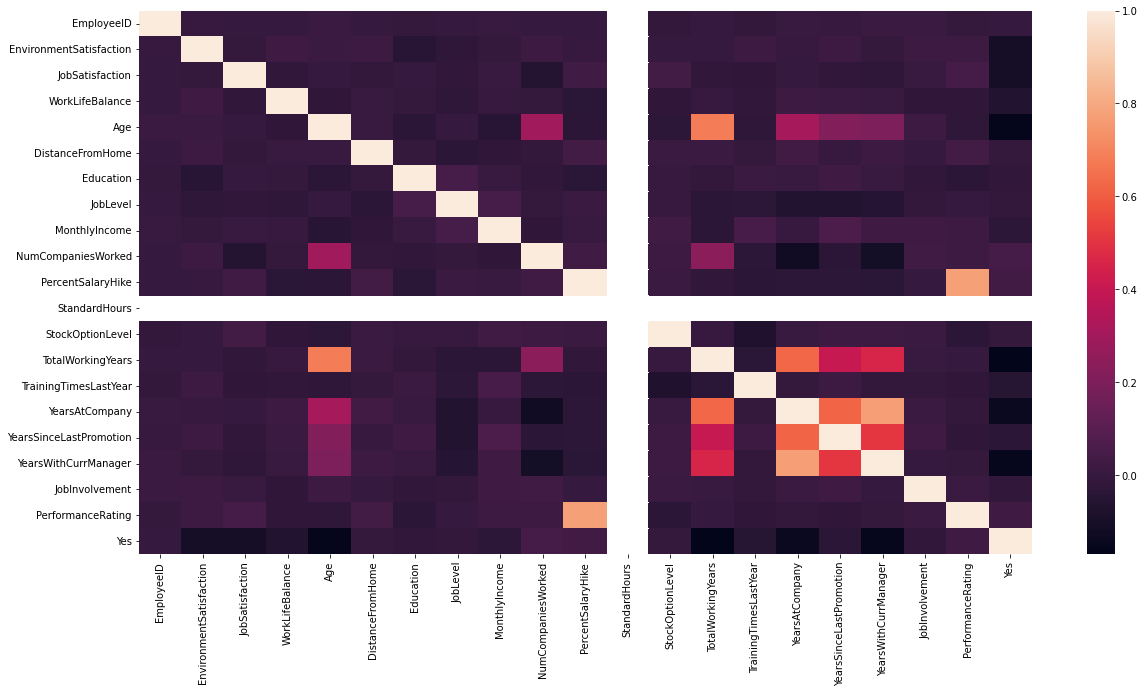

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr())

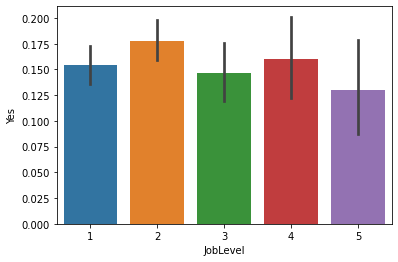

In [ ]:
sns.barplot(x='JobLevel', y='Yes', data=df)

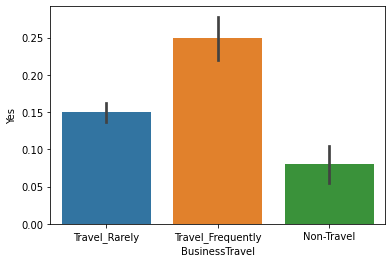

In [ ]:
sns.barplot(x='BusinessTravel', y='Yes', data=df)

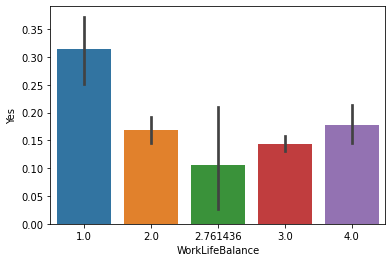

In [ ]:
sns.barplot(x='WorkLifeBalance', y='Yes', data=df)

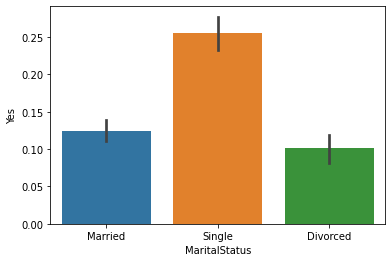

In [ ]:
sns.barplot(x='MaritalStatus', y='Yes', data=df)

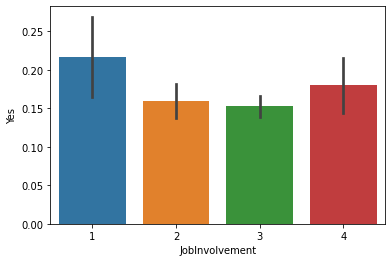

In [ ]:
sns.barplot(x='JobInvolvement', y='Yes', data=df)

<h1> Data Wrangling

In [ ]:
from sklearn.preprocessing import LabelEncoder
for column in df.columns:
  if df[column].dtype==np.number:
    continue
  else:
    df[column]=LabelEncoder().fit_transform(df[column])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  This is separate from the ipykernel package so we can avoid doing imports until


#Random Forest ML Model

To predict the Employee Attrition 

<h3>This encodes the Label values into Numerical data

In [ ]:
from sklearn.preprocessing import LabelEncoder
for column in df.columns:
  if df[column].dtype==np.number:
    continue
  else:
    df[column]=LabelEncoder().fit_transform(df[column])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  This is separate from the ipykernel package so we can avoid doing imports until


Train Test Split is imported from Sklearn.model The Random Forest Classifier is imported

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)

<h3>X and y values are seperated

In [ ]:
x = df.drop(['Yes'], axis=1)
y = df['Yes']

<h3>The training and testing dataset is splitted

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=0)

<h3>Checking X train after splitting

In [ ]:
x_train.head()

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating
1087,1087,4.0,2.0,3.0,2,2,1,0,5,1,1,2,1,29,0.0,0,14,0,1,4.0,2,3,0,2,1,1
1621,1621,1.0,3.0,3.0,1,2,9,2,2,0,1,0,0,295,2.0,0,2,0,1,19.0,0,5,0,2,1,0
1804,1804,3.0,4.0,2.0,2,1,5,3,4,1,1,3,1,844,1.0,0,3,0,0,26.0,2,26,3,0,3,0
744,744,3.0,4.0,3.0,1,1,5,3,3,0,1,5,2,821,2.0,0,4,0,1,10.0,2,2,2,2,2,0
686,686,3.0,4.0,3.0,0,1,0,2,3,1,4,7,1,773,0.0,0,2,0,0,10.0,2,9,7,5,1,0


<h3>Similarly y train

In [ ]:
y_train.tail()

1033    1
3264    0
1653    0
2607    1
2732    1
Name: Yes, dtype: int64

<h3>Fitting the DATASET in RANDOM FOREST Model

In [ ]:
rf.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

<h2>Checking the scores of Training Data

In [ ]:
rf.score(x_train,y_train)

0.9980563654033042

<h3>It performs very well in Training Data Set (99.838%)

<h2>Predicting the y test data in Randomforest Model

In [ ]:
pred = rf.predict(x_test)

<h3>Importing Accuracy score package to calculate the score of Prediction

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred)

0.9674981103552532

<h1>The ML Model predicts the Testing Data with high Accuracy(97.50%)
<h2>This is the Best fit model for given data